# CNN with small datasets

> - Overcom overfitting:  
   **  (1) Data augmentation  
     (2) Doing feature extraction using a pre-trained model  
     (3) Fine-tuning a pre-trained model**  
> - Small Datasets: 4,000 images (2000 cats, 2000 dogs) (2000 for training, 1000 for validation, 1000 for test)  
> - Reference : Deep learning with python by F.Chollet

In [2]:
import numpy as np
import pandas as pd

import keras

import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = [12, 8]

### Preparation of datasets (dogs=1 vs. cats=0)

> download dataset from: https://www.kaggle.com/c/dogs-vs-cats/data  
> unzip it

In [3]:
import os, shutil

In [6]:
# The path to the directory where the original
# dataset was uncompressed
original_dataset_dir = '/Users/ihongdon/Downloads/all/train'

# The directory where we will
# store our smaller dataset
base_dir = '/Users/ihongdon/Downloads/cats_and_dogs_small'

# Directories for our training,
# validation and test splits
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

# Directory with our validation cat pictures
test_cats_dir = os.path.join(test_dir, 'cats')

# Directory with our validation dog pictures
test_dogs_dir = os.path.join(test_dir, 'dogs')

In [ ]:
# make a path diroctory
os.mkdir(base_dir)
os.mkdir(train_dir)
os.mkdir(validation_dir)
os.mkdir(test_dir)

os.mkdir(train_cats_dir)
os.mkdir(train_dogs_dir)
os.mkdir(validation_cats_dir)

os.mkdir(validation_dogs_dir)
os.mkdir(test_cats_dir)
os.mkdir(test_dogs_dir)

In [7]:
# Copy first 1000 cat images to train_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 cat images to validation_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 cat images to test_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy first 1000 dog images to train_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 dog images to validation_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 dog images to test_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

Check how many pictures are there in each training/validation/test split.  
* Balanced binary classification problem ==> 'accuracy' metric

In [7]:
print('total training cat images:', len(os.listdir(train_cats_dir)));
print('total training dog images:', len(os.listdir(train_dogs_dir)));
print('total validation cat images:', len(os.listdir(validation_cats_dir)));
print('total validation dog images:', len(os.listdir(validation_dogs_dir)));
print('total test cat images:', len(os.listdir(test_cats_dir)));
print('total test dog images:', len(os.listdir(test_dogs_dir)));

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


#### Image Preprocessing to floating point tensors of [0, 1] interval

- Read the picture files.
- Decode the JPEG content to RGB grids of pixcels.
- Convert these into floating point tensors.
- Rescale the pixel value (b/w 0 and 255) to the [0, 1] interval

In [8]:
# ImageDataGenerator class: allows to quickly set up Python generators 
# that can automatically turn image files on disk into batches of pre-processed tensors.
from keras.preprocessing.image import ImageDataGenerator

# rescaling by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir, # traget directory
    target_size=(150, 150), # resized to 150x150
    batch_size=20,
    class_mode='binary' # binary labels
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir, 
    target_size=(150, 150), 
    batch_size=20, 
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [9]:
n = 0
for data_batch, labels_batch in train_generator:
    n += 1
    print(n, 'data batch shape: ', data_batch.shape)
    print(n, 'labels batch shape: ', labels_batch.shape)
    print('--------------------------------------')
    
    if n == 5:
        break # without break train_generator iterates endlessly

1 data batch shape:  (20, 150, 150, 3)
1 labels batch shape:  (20,)
--------------------------------------
2 data batch shape:  (20, 150, 150, 3)
2 labels batch shape:  (20,)
--------------------------------------
3 data batch shape:  (20, 150, 150, 3)
3 labels batch shape:  (20,)
--------------------------------------
4 data batch shape:  (20, 150, 150, 3)
4 labels batch shape:  (20,)
--------------------------------------
5 data batch shape:  (20, 150, 150, 3)
5 labels batch shape:  (20,)
--------------------------------------


## 1. Training CNN from scratch as a baseline

In [10]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [12]:
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=1e-4), 
             loss='binary_crossentropy', 
             metrics=['acc'])

In [17]:
hist = model.fit_generator(
    train_generator, 
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50
)

Epoch 1/30
100/100 [==============================] - 59s 593ms/step - loss: 0.6882 - acc: 0.5430 - val_loss: 0.6694 - val_acc: 0.6210
Epoch 2/30
100/100 [==============================] - 58s 583ms/step - loss: 0.6528 - acc: 0.6115 - val_loss: 0.6362 - val_acc: 0.6460
Epoch 3/30
100/100 [==============================] - 59s 589ms/step - loss: 0.6036 - acc: 0.6695 - val_loss: 0.6454 - val_acc: 0.6220
Epoch 4/30
100/100 [==============================] - 59s 592ms/step - loss: 0.5683 - acc: 0.7095 - val_loss: 0.6139 - val_acc: 0.6690
Epoch 5/30
100/100 [==============================] - 61s 606ms/step - loss: 0.5453 - acc: 0.7175 - val_loss: 0.5805 - val_acc: 0.6940
Epoch 6/30
100/100 [==============================] - 58s 581ms/step - loss: 0.5212 - acc: 0.7440 - val_loss: 0.5868 - val_acc: 0.6860
Epoch 7/30
100/100 [==============================] - 59s 585ms/step - loss: 0.5061 - acc: 0.7440 - val_loss: 0.5767 - val_acc: 0.6950
Epoch 8/30
100/100 [==============================] - 6

In [18]:
# save a model above
model.save('cats_dogs_small_1.h5')

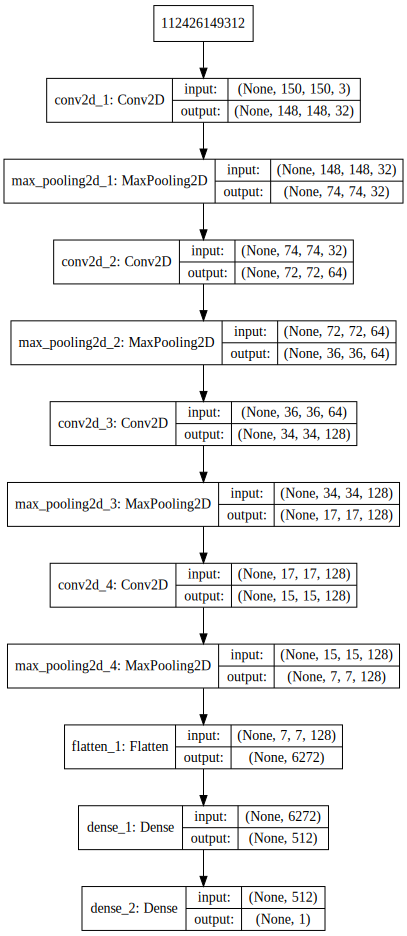

In [19]:
# model architecture
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

%matplotlib inline

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

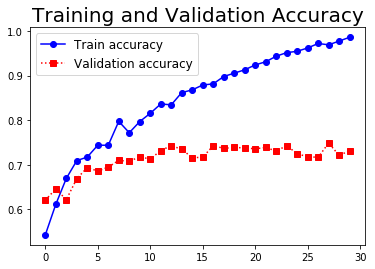

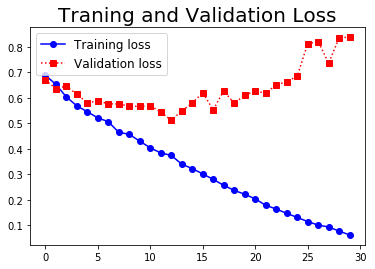

In [20]:
# plot of loss and accuracy of training & validation set
acc = hist.history['acc']
val_acc = hist.history['val_acc']
loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', linestyle='-', label='Train accuracy')
plt.plot(epochs, val_acc, 'rs', linestyle=':', label='Validation accuracy')
plt.title('Training and Validation Accuracy', fontsize=20)
plt.legend(fontsize=12, loc='best')

plt.figure()

plt.plot(epochs, loss, 'bo', linestyle='-', label='Training loss')
plt.plot(epochs, val_loss, 'rs', linestyle=':', label='Validation loss')
plt.title("Traning and Validation Loss", fontsize=20)
plt.legend(fontsize=12, loc='best')

plt.show()

It sure seems like that this model with small dataset is overfitted. 

## 2. How to mitigate overfitting

### 2-1. Data augmentation

- Data augmentation generate samples via a number of random transformations
- In Keras, is's done by configuring a number of random transformations to be performed on the images read by ImageDataGenerator instance.

In [22]:
datagen = ImageDataGenerator(
    rotation_range=60, 
    width_shift_range=0.2, 
    height_shift_range=0.2, 
    shear_range=0.2, 
    zoom_range=0.2, 
    horizontal_flip=True,
    fill_mode='nearest'
)

In [23]:
# samples of augmented images
from keras.preprocessing import image

fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]

# pick one image to augment
img_path = fnames[5]

# read the image and resize it
img = image.load_img(img_path, target_size=(150, 150))

# convert it to a numpy array with shape (150, 150, 3)
x = image.img_to_array(img)

# reshape it to (1, 150, 150, 3)
x = x.reshape((1,) + x.shape)

In [32]:
x.shape

(1, 150, 150, 3)

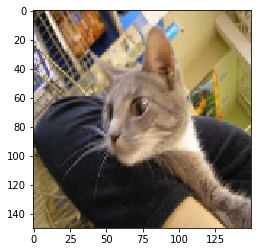

In [30]:
# original image
plt.imshow(image.array_to_img(x[0]))
plt.show()

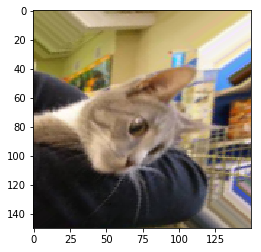

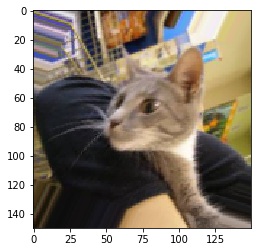

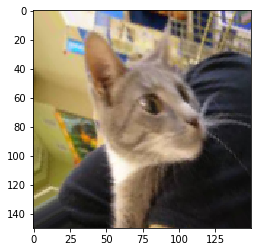

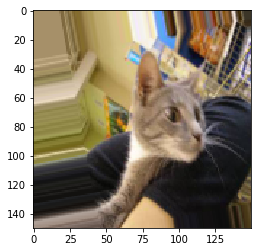

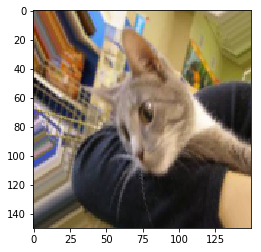

In [26]:
# generates batches of randomly transformed images
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i == 5:
        break
        
plt.show()

In [35]:
# build the convnet model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# compile the convnet
model.compile(optimizer=optimizers.RMSprop(lr=1e-4), 
             loss='binary_crossentropy', 
             metrics=['acc'])

In [36]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [37]:
#-----
# Train the convnet using data augmentation and dropout
#-----

# train data is augmented
train_datagen = ImageDataGenerator(
    rescale=1./255, 
    rotation_range=50,
    width_shift_range=0.3, 
    height_shift_range=0.3, 
    shear_range=0.3, 
    zoom_range=0.3, 
    horizontal_flip=True
)

# validation data is NOT augmented
valid_datagen = ImageDataGenerator(rescale=1./255)

# generator
train_generator = train_datagen.flow_from_directory(
    train_dir, # target directory
    target_size=(150, 150), # resized to 150x150
    batch_size=32,
    class_mode='binary'
)

validation_generator = valid_datagen.flow_from_directory(
    validation_dir, 
    target_size=(150, 150), 
    batch_size=32, 
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [38]:
hist = model.fit_generator(
    train_generator, 
    steps_per_epoch=100, 
    epochs=100, 
    validation_data=validation_generator, 
    validation_steps=50
)

Epoch 1/100
100/100 [==============================] - 88s 885ms/step - loss: 0.6925 - acc: 0.5397 - val_loss: 0.6803 - val_acc: 0.5590
Epoch 2/100
100/100 [==============================] - 87s 872ms/step - loss: 0.6790 - acc: 0.5766 - val_loss: 0.7392 - val_acc: 0.4987
Epoch 3/100
100/100 [==============================] - 90s 905ms/step - loss: 0.6700 - acc: 0.5691 - val_loss: 0.6496 - val_acc: 0.5954
Epoch 4/100
100/100 [==============================] - 90s 896ms/step - loss: 0.6641 - acc: 0.5800 - val_loss: 0.6510 - val_acc: 0.5921
Epoch 5/100
100/100 [==============================] - 89s 885ms/step - loss: 0.6506 - acc: 0.6025 - val_loss: 0.6533 - val_acc: 0.5986
Epoch 6/100
100/100 [==============================] - 90s 898ms/step - loss: 0.6373 - acc: 0.6188 - val_loss: 0.8561 - val_acc: 0.5330
Epoch 7/100
100/100 [==============================] - 91s 911ms/step - loss: 0.6446 - acc: 0.6225 - val_loss: 0.6250 - val_acc: 0.6396
Epoch 8/100
100/100 [===========================

Epoch 61/100
100/100 [==============================] - 90s 898ms/step - loss: 0.4892 - acc: 0.7675 - val_loss: 0.4499 - val_acc: 0.7945
Epoch 62/100
100/100 [==============================] - 88s 884ms/step - loss: 0.4846 - acc: 0.7631 - val_loss: 0.4588 - val_acc: 0.7817
Epoch 63/100
100/100 [==============================] - 89s 892ms/step - loss: 0.4760 - acc: 0.7678 - val_loss: 0.4647 - val_acc: 0.7741
Epoch 64/100
100/100 [==============================] - 86s 863ms/step - loss: 0.4887 - acc: 0.7672 - val_loss: 0.5273 - val_acc: 0.7310
Epoch 65/100
100/100 [==============================] - 89s 895ms/step - loss: 0.4897 - acc: 0.7666 - val_loss: 0.4479 - val_acc: 0.8020
Epoch 66/100
100/100 [==============================] - 89s 894ms/step - loss: 0.4779 - acc: 0.7703 - val_loss: 0.4722 - val_acc: 0.7680
Epoch 67/100
100/100 [==============================] - 89s 892ms/step - loss: 0.4734 - acc: 0.7803 - val_loss: 0.4627 - val_acc: 0.7919
Epoch 68/100
100/100 [===================

In [39]:
# save a model above
model.save('cats_dogs_small_2.h5')

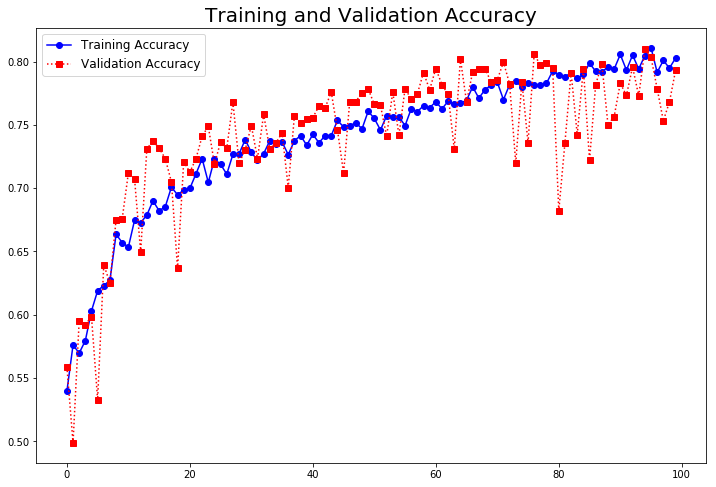

In [43]:
# plot the result of accuracy and loss
acc = hist.history['acc']
val_acc = hist.history['val_acc']
loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs = range(len(acc))

# accuracy
plt.plot(epochs, acc, 'bo', linestyle='-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'rs', linestyle=':', label='Validation Accuracy')
plt.title('Training and Validation Accuracy', fontsize=20)
plt.legend(fontsize=12, loc='best')

plt.show()

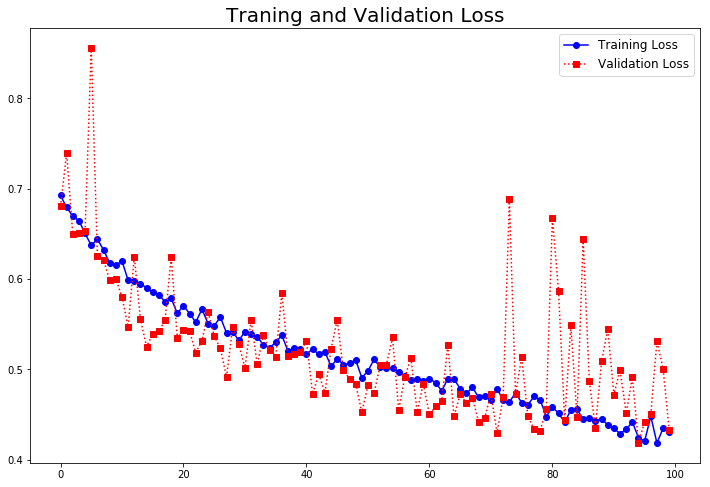

In [44]:
# loss
plt.plot(epochs, loss, 'bo', linestyle='-', label='Training Loss')
plt.plot(epochs, val_loss, 'rs', linestyle=':', label='Validation Loss')
plt.title('Traning and Validation Loss', fontsize=20)
plt.legend(fontsize=12, loc='best')

plt.show()

### 2-2. Doing feature extraction using a pre-trained model

### 2-3. Fine-tuning a pre-trained model